In [33]:
!pip install dna_features_viewer

In [249]:
!pip install --upgrade forgi[all]

     |████████████████████████████████| 26.6 MB 4.4 MB/s eta 0:00:01
Processing /home/jovyan/.cache/pip/wheels/8e/70/28/3d6ccd6e315f65f245da085482a2e1c7d14b90b30f239e2cf4/future-0.18.2-py3-none-any.whl
  Using cached networkx-2.5-py3-none-any.whl (1.6 MB)
     |████████████████████████████████| 1.9 MB 39.1 MB/s eta 0:00:01
     |████████████████████████████████| 115 kB 45.7 MB/s eta 0:00:01
  Created wheel for forgi: filename=forgi-2.0.2-cp38-cp38-linux_x86_64.whl size=27522285 sha256=5debe25b388d8a889662f3f2a8a81f8a5911dfbedbe5efbc19e06a47740bb60c
  Stored in directory: /home/jovyan/.cache/pip/wheels/02/f3/b3/a674b70ed5533bfc9361a9aa3fbb8cdf1add94a915c86551c0
Successfully built forgi


In [349]:
from Bio import Entrez
import matplotlib.pyplot as plt
from dna_features_viewer import *

In [4]:
Entrez.email = "abondarenko@berkeley.edu"

In [64]:
# access from NCBI RefSeq
handle = Entrez.efetch(db="nucleotide", id="NC_045512", retmode="xml")
features = Entrez.read(handle)[0]

In [65]:
features.keys()

dict_keys(['GBSeq_locus', 'GBSeq_length', 'GBSeq_strandedness', 'GBSeq_moltype', 'GBSeq_topology', 'GBSeq_division', 'GBSeq_update-date', 'GBSeq_create-date', 'GBSeq_definition', 'GBSeq_primary-accession', 'GBSeq_accession-version', 'GBSeq_other-seqids', 'GBSeq_project', 'GBSeq_keywords', 'GBSeq_source', 'GBSeq_organism', 'GBSeq_taxonomy', 'GBSeq_references', 'GBSeq_comment', 'GBSeq_feature-table', 'GBSeq_sequence', 'GBSeq_xrefs'])

In [66]:
seq = features['GBSeq_sequence']
len(seq)

29903

In [67]:
features['GBSeq_comment']

"REVIEWED REFSEQ: This record has been curated by NCBI staff. The reference sequence is identical to MN908947.; On Jan 17, 2020 this sequence version replaced NC_045512.1.; Annotation was added using homology to SARSr-CoV NC_004718.3. ### Formerly called 'Wuhan seafood market pneumonia virus.' If you have questions or suggestions, please email us at info@ncbi.nlm.nih.gov and include the accession number NC_045512.### Protein structures can be found at https://www.ncbi.nlm.nih.gov/structure/?term=sars-cov-2.### Find all other Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) sequences at https://www.ncbi.nlm.nih.gov/genbank/sars-cov-2-seqs/; ; ##Assembly-Data-START## ; Assembly Method :: Megahit v. V1.1.3 ; Sequencing Technology :: Illumina ; ##Assembly-Data-END##; COMPLETENESS: full length."

In [68]:
features['GBSeq_definition']

'Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome'

In [175]:
[(f['GBFeature_key'], len(f['GBFeature_intervals'])) for f in features['GBSeq_feature-table']]

[('source', 1),
 ("5'UTR", 1),
 ('gene', 1),
 ('CDS', 2),
 ('mat_peptide', 1),
 ('mat_peptide', 1),
 ('mat_peptide', 1),
 ('mat_peptide', 1),
 ('mat_peptide', 1),
 ('mat_peptide', 1),
 ('mat_peptide', 1),
 ('mat_peptide', 1),
 ('mat_peptide', 1),
 ('mat_peptide', 1),
 ('mat_peptide', 2),
 ('mat_peptide', 1),
 ('mat_peptide', 1),
 ('mat_peptide', 1),
 ('mat_peptide', 1),
 ('CDS', 1),
 ('mat_peptide', 1),
 ('mat_peptide', 1),
 ('mat_peptide', 1),
 ('mat_peptide', 1),
 ('mat_peptide', 1),
 ('mat_peptide', 1),
 ('mat_peptide', 1),
 ('mat_peptide', 1),
 ('mat_peptide', 1),
 ('mat_peptide', 1),
 ('mat_peptide', 1),
 ('stem_loop', 1),
 ('stem_loop', 1),
 ('gene', 1),
 ('CDS', 1),
 ('gene', 1),
 ('CDS', 1),
 ('gene', 1),
 ('CDS', 1),
 ('gene', 1),
 ('CDS', 1),
 ('gene', 1),
 ('CDS', 1),
 ('gene', 1),
 ('CDS', 1),
 ('gene', 1),
 ('CDS', 1),
 ('gene', 1),
 ('CDS', 1),
 ('gene', 1),
 ('CDS', 1),
 ('gene', 1),
 ('CDS', 1),
 ('stem_loop', 1),
 ('stem_loop', 1),
 ("3'UTR", 1),
 ('stem_loop', 1)]

In [245]:
features['GBSeq_feature-table'][4]

{'GBFeature_key': 'mat_peptide', 'GBFeature_location': '266..805', 'GBFeature_intervals': [{'GBInterval_from': '266', 'GBInterval_to': '805', 'GBInterval_accession': 'NC_045512.2'}], 'GBFeature_quals': [{'GBQualifier_name': 'gene', 'GBQualifier_value': 'ORF1ab'}, {'GBQualifier_name': 'locus_tag', 'GBQualifier_value': 'GU280_gp01'}, {'GBQualifier_name': 'product', 'GBQualifier_value': 'leader protein'}, {'GBQualifier_name': 'note', 'GBQualifier_value': 'nsp1; produced by both pp1a and pp1ab'}, {'GBQualifier_name': 'protein_id', 'GBQualifier_value': 'YP_009725297.1'}, {'GBQualifier_name': 'peptide', 'GBQualifier_value': 'MESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGTCGLVEVEKGVLPQLEQPYVFIKRSDARTAPHGHVMVELVAELEGIQYGRSGETLGVLVPHVGEIPVAYRKVLLRKNGNKGAGGHSYGADLKSFDLGDELGTDPYEDFQENWNTKHSSGVTRELMRELNGG'}]}

In [182]:
len(seq)

29903

In [560]:
gfeatures = []
colors = {
    "gene": "#ffd700",
    "CDS": "#ffcccc",
    "mat_peptide": "#cffccc",
    "stem_loop": "#ccccff",
}
locations = set()
stem_loops = []
coverage = 0
elements = []

import subprocess

def rnafold(inseq, out=None, free_energy=False):
    args = ['RNAfold', '-t4']
    if free_energy:
        args.append('-p')
    try:
        p = subprocess.run(args,
           input=bytes(inseq, 'ascii'),
           stdout=subprocess.PIPE, check=True,
           stderr=subprocess.PIPE)
        result = p.stdout.decode()
        if out is not None:
            subprocess.run(['mv', 'rna.ps', out+'.ps'], check=True)
        return result
    except subprocess.CalledProcessError as err:
        print(err, err.output.decode(), p.stderr.decode())

for f in features['GBSeq_feature-table']:
    key = f['GBFeature_key']
    strand = +1
    loc = f['GBFeature_location']
    if loc in locations:
        pprint.pprint(f)
        continue
    else:
        locations.add(loc)
    if key == 'CDS':
        if len(f['GBFeature_intervals']) >= 2:
            label = f['GBFeature_quals'][0]['GBQualifier_value'][:-len(f['GBFeature_intervals'])]
            for i, interval in enumerate(f['GBFeature_intervals']):
                gfeatures.append(GraphicFeature(
                    start=int(interval['GBInterval_from']),
                    end=int(interval['GBInterval_to']),
                    strand=strand,
                    label=label+chr(ord('a')+i),
                    color=colors.get(key, '#000080'),
                ))
        continue
    elif key == 'source':
        continue
    elif key == 'mat_peptide':
        product = next(qual for qual in f['GBFeature_quals'] if qual['GBQualifier_name'] == 'product')['GBQualifier_value']
        note = next(qual for qual in f['GBFeature_quals'] if qual['GBQualifier_name'] == 'note')['GBQualifier_value'].split('; ')
        if len(note) >= 1:
            label = note[0] if len(note[0]) < len(product) else product
        else:
            label = product
    elif key == 'stem_loop':
        f = f.copy()
        f['label'] = next(qual for qual in f['GBFeature_quals'] if qual['GBQualifier_name'] == 'function')['GBQualifier_value']
        stem_loops.append(f)
        continue
    elif 'GBFeature_quals' in f:
        label = f['GBFeature_quals'][0]['GBQualifier_value'] + ' ' + key
    else:
        label = key
    if key == 'gene' and not f['GBFeature_quals'][0]['GBQualifier_value'].startswith('ORF1a') or key == 'mat_peptide' or key.endswith('UTR'):
        coverage += int(f['GBFeature_intervals'][-1]['GBInterval_to']) - int(f['GBFeature_intervals'][0]['GBInterval_from']) + 1
        f = f.copy()
        f['seq'] = seq[int(f['GBFeature_intervals'][0]['GBInterval_from'])-1:int(f['GBFeature_intervals'][-1]['GBInterval_to'])]
        f['label'] = label
        print(f)
        f['qualifiers'] = dict((q['GBQualifier_name'], q.get('GBQualifier_value')) for q in f.get('GBFeature_quals', ()))
        elements.append(f)
    gfeatures.append(GraphicFeature(
        start=int(f['GBFeature_intervals'][0]['GBInterval_from']),
        end=int(f['GBFeature_intervals'][-1]['GBInterval_to']),
        strand=strand,
        label=label,
        color=colors.get(key, '#000080'),
    ))

{'GBFeature_key': "5'UTR", 'GBFeature_location': '1..265', 'GBFeature_intervals': [{'GBInterval_from': '1', 'GBInterval_to': '265', 'GBInterval_accession': 'NC_045512.2'}], 'seq': 'attaaaggtttataccttcccaggtaacaaaccaaccaactttcgatctcttgtagatctgttctctaaacgaactttaaaatctgtgtggctgtcactcggctgcatgcttagtgcactcacgcagtataattaataactaattactgtcgttgacaggacacgagtaactcgtctatcttctgcaggctgcttacggtttcgtccgtgttgcagccgatcatcagcacatctaggtttcgtccgggtgtgaccgaaaggtaag', 'label': "5'UTR"}
{'GBFeature_key': 'mat_peptide', 'GBFeature_location': '266..805', 'GBFeature_intervals': [{'GBInterval_from': '266', 'GBInterval_to': '805', 'GBInterval_accession': 'NC_045512.2'}], 'GBFeature_quals': [{'GBQualifier_name': 'gene', 'GBQualifier_value': 'ORF1ab'}, {'GBQualifier_name': 'locus_tag', 'GBQualifier_value': 'GU280_gp01'}, {'GBQualifier_name': 'product', 'GBQualifier_value': 'leader protein'}, {'GBQualifier_name': 'note', 'GBQualifier_value': 'nsp1; produced by both pp1a and pp1ab'}, {'GBQualifier_name': 'protein_id', 

In [274]:
len(seq) - coverage

109

In [366]:
import tqdm

for f in tqdm.tqdm(elements):
    lines = rnafold(f['seq'], f['label']).split('\n')
    f['mfe_structures'] = lines
    #f['mfe_structures'] = {
    #    'brackets': [tuple(l.split(' ', maxsplit=1)) for l in lines[1:-2]],
    #    'extra': [tuple(p.strip().rsplit(' ', 1)) for p in lines[-2].split('; ')],
    #}

100%|██████████| 33/33 [03:03<00:00,  5.56s/it]


In [341]:
elements[0]

{'GBFeature_key': "5'UTR",
 'GBFeature_location': '1..265',
 'GBFeature_intervals': [{'GBInterval_from': '1', 'GBInterval_to': '265', 'GBInterval_accession': 'NC_045512.2'}],
 'seq': 'attaaaggtttataccttcccaggtaacaaaccaaccaactttcgatctcttgtagatctgttctctaaacgaactttaaaatctgtgtggctgtcactcggctgcatgcttagtgcactcacgcagtataattaataactaattactgtcgttgacaggacacgagtaactcgtctatcttctgcaggctgcttacggtttcgtccgtgttgcagccgatcatcagcacatctaggtttcgtccgggtgtgaccgaaaggtaag',
 'label': "5'UTR",
 'mfe_structures': ['auuaaagguuuauaccuucccagguaacaaaccaaccaacuuucgaucucuuguagaucuguucucuaaacgaacuuuaaaaucuguguggcugucacucggcugcaugcuuagugcacucacgcaguauaauuaauaacuaauuacugucguugacaggacacgaguaacucgucuaucuucugcaggcugcuuacgguuucguccguguugcagccgaucaucagcacaucuagguuucguccgggugugaccgaaagguaag',
  '......(((((.(((((....)))))..)))))......((((((......((((((...((((.......))))........((((((((.((.((((.(((.....))).)))))).))))))))..((((((.....))))))(((((...)))))...(((((...)))))......))))))((((((.(((((......)))))..)))))).........(((((((.((

In [500]:
entropy_tsv = np.genfromtxt('nextstrain_ncov_global_diversity_entropy.tsv', skip_header=1)
events_tsv = np.genfromtxt('nextstrain_ncov_global_diversity_events.tsv', skip_header=1)

In [513]:
idx, ent = entropy_tsv.T
idx = idx.astype(int)
entropy = np.zeros(idx.max())
entropy[idx-1] = ent

idx, evt = events_tsv.T
idx = idx.astype(int)
events = np.zeros(idx.max())
events[idx-1] = evt

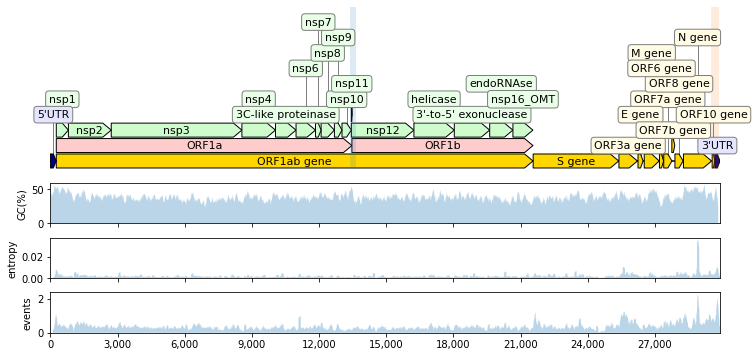

In [541]:
#from dna_features_viewer import BiopythonTranslator
import numpy as np

fig, (ax1, ax2, ax3, ax4) = plt.subplots(
    4, 1, figsize=(12, 6), sharex=True, gridspec_kw={"height_ratios": [4, 1, 1, 1]}
)

# PLOT THE RECORD MAP
record = GraphicRecord(sequence_length=len(seq), features=gfeatures)
record.plot(ax=ax1, with_ruler=False)

pad = 100
def interval_range(elems):
    return int(elems[0]['GBFeature_intervals'][0]['GBInterval_from']), int(elems[-1]['GBFeature_intervals'][0]['GBInterval_to'])
lo1, hi1 = interval_range(stem_loops[:2])
lo2, hi2 = interval_range(stem_loops[2:])
ax1.fill_between((lo1-pad, hi1+pad), +1000, -1000, alpha=0.15)
ax1.fill_between((lo2-pad, hi2+pad), +1000, -1000, alpha=0.15)


# PLOT THE LOCAL GC CONTENT (we use 50bp windows)
window = 100
gc = lambda s: 100.0 * len([c for c in s if c in "gc"]) / window
xx = np.arange(len(seq) - window)
yy = [gc(seq[x : x + window]) for x in xx]
ax2.fill_between(xx + 25, yy, alpha=0.3)
ax2.set_ylim(bottom=0)
ax2.set_ylabel("GC(%)")

filter = np.ones(window)/window
def running_mean(x):
    return np.convolve(x, filter, mode='full')

ax3.fill_between(np.arange(len(entropy)+window-1), running_mean(entropy), alpha=0.3)
ax3.set_ylim(bottom=0)
ax3.set_ylabel("entropy")

ax4.fill_between(np.arange(len(events)+window-1), running_mean(events), alpha=0.3)
ax4.set_ylim(bottom=0)
ax4.set_ylabel("events")

plt.show()

In [576]:
import pandas as pd

rows = []
print(elements[-7])
for f in elements:
    intervals = f['GBFeature_intervals']
    lo, hi = int(intervals[0]['GBInterval_from']), int(intervals[-1]['GBInterval_to'])
    span = hi - lo+1
    rows.append((f['label'], f['GBFeature_key'], f['qualifiers'].get('locus_tag'), span, np.sum(events[lo-1:hi])/span, np.sum(entropy[lo-1:hi])/span, f['qualifiers'].get('note', '')))
pd.DataFrame(rows, columns=['label', 'type', 'locus', 'length', 'events/bp', 'entropy/bp', 'notes']).to_markdown()

{'GBFeature_key': 'gene', 'GBFeature_location': '27202..27387', 'GBFeature_intervals': [{'GBInterval_from': '27202', 'GBInterval_to': '27387', 'GBInterval_accession': 'NC_045512.2'}], 'GBFeature_quals': [{'GBQualifier_name': 'gene', 'GBQualifier_value': 'ORF6'}, {'GBQualifier_name': 'locus_tag', 'GBQualifier_value': 'GU280_gp06'}, {'GBQualifier_name': 'db_xref', 'GBQualifier_value': 'GeneID:43740572'}], 'seq': 'atgtttcatctcgttgactttcaggttactatagcagagatattactaattattatgaggacttttaaagtttccatttggaatcttgattacatcataaacctcataattaaaaatttatctaagtcactaactgagaataaatattctcaattagatgaagagcaaccaatggagattgattaa', 'label': 'ORF6 gene', 'qualifiers': {'gene': 'ORF6', 'locus_tag': 'GU280_gp06', 'db_xref': 'GeneID:43740572'}}


"|    | label                | type        | locus      |   length |   events/bp |   entropy/bp | notes                                                                                                                                                                                                                                       |\n|---:|:---------------------|:------------|:-----------|---------:|------------:|-------------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|\n|  0 | 5'UTR                | 5'UTR       |            |      265 |    0.479245 |  0.00320377  |                                                                                                                                                                                                                                       

In [575]:
!pip install tabulate

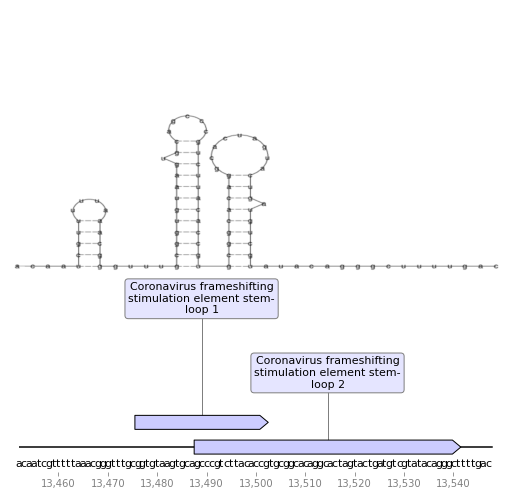

In [550]:
from io import BytesIO
import matplotlib.image as img

def plot_stem_loops(sls, rng, n_lines=1, **plot_kwargs):
    slfeatures = []
    for f in sls:
        slfeatures.append(GraphicFeature(
            start=int(f['GBFeature_intervals'][0]['GBInterval_from']),
            end=int(f['GBFeature_intervals'][-1]['GBInterval_to']),
            strand=1,
            label=str(f['label']),
            color=colors.get(key, '#000080'),
        ))

    rnafold(seq[rng[0]:rng[1]])
    image = Image(filename='rna.ps')
    factor = 100
    image.resample(x_res=3*factor, y_res=factor)
    blob = BytesIO(image.make_blob('png'))
        
    record = GraphicRecord(sequence=seq, features=slfeatures)
    fig, axs = record.crop(rng).plot_on_multiple_lines(plot_sequence=True, n_lines=n_lines, **plot_kwargs)
    
    ax = fig.add_axes([.005, .5+.1*(n_lines-1), .99, 1.5])
    ax.imshow(img.imread(blob), aspect='auto')
    ax.set_axis_off()

plot_stem_loops(stem_loops[:2], (lo1-24, hi1+6), figure_width=7, max_label_length=60)

In [448]:
from IPython.display import display

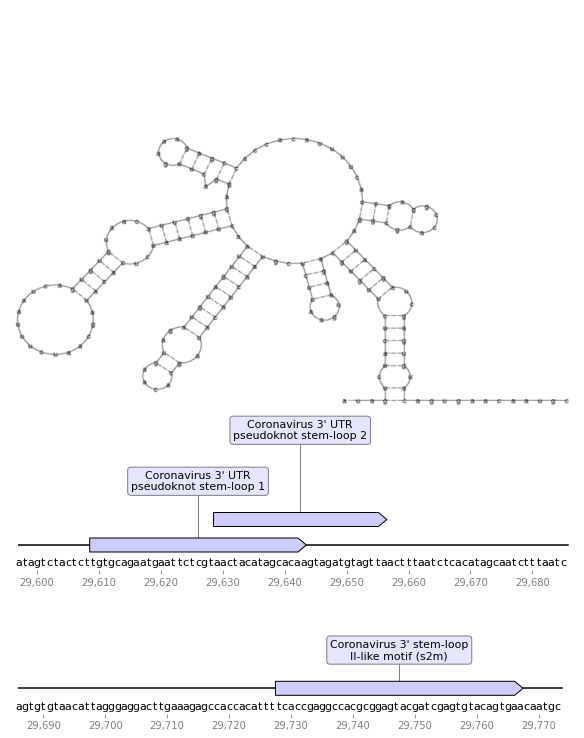

In [551]:
plot_stem_loops(stem_loops[2:], (lo2-12, hi2+6), n_lines=2,  figure_width=8)

In [190]:
import re

for m in re.finditer(r"(.)\1\1([au])\2\2[acu]", seq):
    print(m.group(), m.start())

tttaaaa 75
cccaaaa 1346
tttaaac 1663
cccaaaa 2469
tttaaaa 3357
tttaaac 6084
tttaaaa 6513
tttaaac 6744
tttaaaa 7693
tttaaac 13461
tttaaac 16668
tttaaaa 17649
tttaaaa 18216
tttaaac 18474
tttaaaa 19352
cccaaac 20088
tttaaac 20226
cccaaaa 20645
tttaaac 20816
tttaaaa 21440
tttaaaa 22162
tttaaac 24435
tttaaaa 27482
cccaaaa 28289
aaaaaaa 29870
aaaaaaa 29877
aaaaaaa 29884
aaaaaaa 29891


In [189]:
import pprint

pprint.pprint(cdss)

[{'GBFeature_intervals': [{'GBInterval_from': '266', 'GBInterval_to': '13468', 'GBInterval_accession': 'NC_045512.2'}, {'GBInterval_from': '13468', 'GBInterval_to': '21555', 'GBInterval_accession': 'NC_045512.2'}],
  'GBFeature_key': 'CDS',
  'GBFeature_location': 'join(266..13468,13468..21555)',
  'GBFeature_operator': 'join',
  'GBFeature_quals': [{'GBQualifier_name': 'gene', 'GBQualifier_value': 'ORF1ab'}, {'GBQualifier_name': 'locus_tag', 'GBQualifier_value': 'GU280_gp01'}, {'GBQualifier_name': 'ribosomal_slippage'}, {'GBQualifier_name': 'note', 'GBQualifier_value': 'pp1ab; translated by -1 ribosomal frameshift'}, {'GBQualifier_name': 'codon_start', 'GBQualifier_value': '1'}, {'GBQualifier_name': 'transl_table', 'GBQualifier_value': '1'}, {'GBQualifier_name': 'product', 'GBQualifier_value': 'ORF1ab polyprotein'}, {'GBQualifier_name': 'protein_id', 'GBQualifier_value': 'YP_009724389.1'}, {'GBQualifier_name': 'db_xref', 'GBQualifier_value': 'GeneID:43740578'}, {'GBQualifier_name': 't

In [194]:
!pip install viennarna  

ERROR: Could not find a version that satisfies the requirement viennarna (from versions: none)
ERROR: No matching distribution found for viennarna


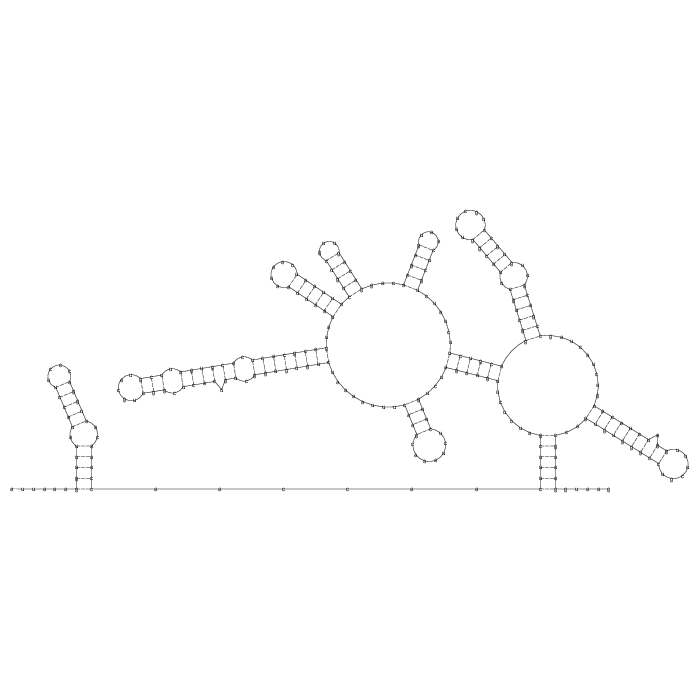

In [347]:
from wand.image import Image
Image(filename="5'UTR.ps")

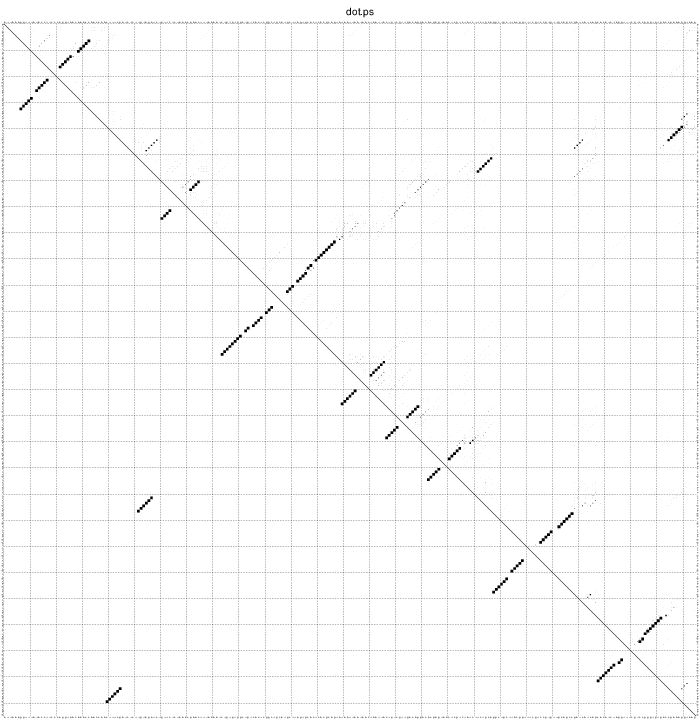

In [248]:
Image(filename='dot.ps')

/opt/conda/lib/python3.8/site-packages/forgi/graph/bulge_graph.py:348: UserWarning: Original sequence contained T. All occurrences of T/t were replaced by U/u respectively!
  warnings.warn(


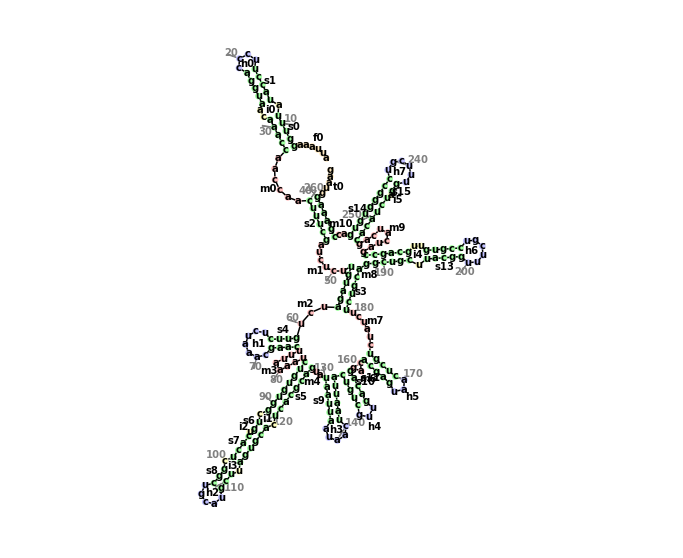

In [344]:
import forgi
import forgi.graph.bulge_graph as fgb
import forgi.visual.mplotlib as fvm
fx = '\n'.join([elements[0]['seq'], elements[0]['mfe_structures'][1].split(' ', 1)[0]])

rna = fgb.BulgeGraph.from_fasta_text(fx)[0]
fig, (ax1) = plt.subplots(
    1, 1, figsize=(12, 10)
)
fvm.plot_rna(rna, ax=ax1, lighten=.75)
plt.show()

In [354]:
[f['GBFeature_quals'] for f in stem_loops]

[[{'GBQualifier_name': 'gene', 'GBQualifier_value': 'ORF1ab'}, {'GBQualifier_name': 'locus_tag', 'GBQualifier_value': 'GU280_gp01'}, {'GBQualifier_name': 'inference', 'GBQualifier_value': 'COORDINATES: profile:Rfam-release-14.1:RF00507,Infernal:1.1.2'}, {'GBQualifier_name': 'function', 'GBQualifier_value': 'Coronavirus frameshifting stimulation element stem-loop 1'}],
 [{'GBQualifier_name': 'gene', 'GBQualifier_value': 'ORF1ab'}, {'GBQualifier_name': 'locus_tag', 'GBQualifier_value': 'GU280_gp01'}, {'GBQualifier_name': 'inference', 'GBQualifier_value': 'COORDINATES: profile:Rfam-release-14.1:RF00507,Infernal:1.1.2'}, {'GBQualifier_name': 'function', 'GBQualifier_value': 'Coronavirus frameshifting stimulation element stem-loop 2'}],
 [{'GBQualifier_name': 'gene', 'GBQualifier_value': 'ORF10'}, {'GBQualifier_name': 'locus_tag', 'GBQualifier_value': 'GU280_gp11'}, {'GBQualifier_name': 'inference', 'GBQualifier_value': 'COORDINATES: profile::Rfam-release-14.1:RF00165,Infernal:1.1.2'}, {'GB

In [240]:
!pip install wand

     |████████████████████████████████| 138 kB 4.4 MB/s eta 0:00:01


In [577]:
print("|    | label                | type        | locus      |   length |   events/bp |   entropy/bp | notes                                                                                                                                                                                                                                       |\n|---:|:---------------------|:------------|:-----------|---------:|------------:|-------------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|\n|  0 | 5'UTR                | 5'UTR       |            |      265 |    0.479245 |  0.00320377  |                                                                                                                                                                                                                                             |\n|  1 | nsp1                 | mat_peptide | GU280_gp01 |      540 |    0.368519 |  0.00223148  | nsp1; produced by both pp1a and pp1ab                                                                                                                                                                                                       |\n|  2 | nsp2                 | mat_peptide | GU280_gp01 |     1914 |    0.429467 |  0.00215308  | produced by both pp1a and pp1ab                                                                                                                                                                                                             |\n|  3 | nsp3                 | mat_peptide | GU280_gp01 |     5835 |    0.320651 |  0.00158338  | former nsp1; conserved domains are: N-terminal acidic (Ac), predicted phosphoesterase, papain-like proteinase, Y-domain, transmembrane domain 1 (TM1), adenosine diphosphate-ribose 1''-phosphatase (ADRP); produced by both pp1a and pp1ab |\n|  4 | nsp4                 | mat_peptide | GU280_gp01 |     1500 |    0.28     |  0.00140333  | nsp4B_TM; contains transmembrane domain 2 (TM2); produced by both pp1a and pp1ab                                                                                                                                                            |\n|  5 | 3C-like proteinase   | mat_peptide | GU280_gp01 |      918 |    0.278867 |  0.00170915  | nsp5A_3CLpro and nsp5B_3CLpro; main proteinase (Mpro); mediates cleavages downstream of nsp4. 3D structure of the SARSr-CoV homolog has been determined (Yang et al., 2003); produced by both pp1a and pp1ab                                |\n|  6 | nsp6                 | mat_peptide | GU280_gp01 |      870 |    0.375862 |  0.00172644  | nsp6_TM; putative transmembrane domain; produced by both pp1a and pp1ab                                                                                                                                                                     |\n|  7 | nsp7                 | mat_peptide | GU280_gp01 |      249 |    0.445783 |  0.00208032  | produced by both pp1a and pp1ab                                                                                                                                                                                                             |\n|  8 | nsp8                 | mat_peptide | GU280_gp01 |      594 |    0.26431  |  0.00117845  | produced by both pp1a and pp1ab                                                                                                                                                                                                             |\n|  9 | nsp9                 | mat_peptide | GU280_gp01 |      339 |    0.289086 |  0.00134218  | ssRNA-binding protein; produced by both pp1a and pp1ab                                                                                                                                                                                      |\n| 10 | nsp10                | mat_peptide | GU280_gp01 |      417 |    0.155875 |  0.000729017 | nsp10_CysHis; formerly known as growth-factor-like protein (GFL); produced by both pp1a and pp1ab                                                                                                                                           |\n| 11 | nsp12                | mat_peptide | GU280_gp01 |     2795 |    0.26297  |  0.00148336  | nsp12; NiRAN and RdRp; produced by pp1ab only                                                                                                                                                                                               |\n| 12 | helicase             | mat_peptide | GU280_gp01 |     1803 |    0.307266 |  0.00154631  | nsp13_ZBD, nsp13_TB, and nsp_HEL1core; zinc-binding domain (ZD), NTPase/helicase domain (HEL), RNA 5'-triphosphatase; produced by pp1ab only                                                                                                |\n| 13 | 3'-to-5' exonuclease | mat_peptide | GU280_gp01 |     1581 |    0.330803 |  0.00167426  | nsp14A2_ExoN and nsp14B_NMT; produced by pp1ab only                                                                                                                                                                                         |\n| 14 | endoRNAse            | mat_peptide | GU280_gp01 |     1038 |    0.317919 |  0.00184971  | nsp15-A1 and nsp15B-NendoU; produced by pp1ab only                                                                                                                                                                                          |\n| 15 | nsp16_OMT            | mat_peptide | GU280_gp01 |      894 |    0.293065 |  0.00156376  | nsp16_OMT; 2'-o-MT; produced by pp1ab only                                                                                                                                                                                                  |\n| 16 | nsp11                | mat_peptide | GU280_gp01 |       39 |    0.230769 |  0.000666667 | produced by pp1a only                                                                                                                                                                                                                       |\n| 17 | S gene               | gene        | GU280_gp02 |     3822 |    0.360806 |  0.00189377  |                                                                                                                                                                                                                                             |\n| 18 | ORF3a gene           | gene        | GU280_gp03 |      828 |    0.810386 |  0.00464614  |                                                                                                                                                                                                                                             |\n| 19 | E gene               | gene        | GU280_gp04 |      228 |    0.342105 |  0.00153947  |                                                                                                                                                                                                                                             |\n| 20 | M gene               | gene        | GU280_gp05 |      669 |    0.360239 |  0.00240359  |                                                                                                                                                                                                                                             |\n| 21 | ORF6 gene            | gene        | GU280_gp06 |      186 |    0.510753 |  0.0021828   |                                                                                                                                                                                                                                             |\n| 22 | ORF7a gene           | gene        | GU280_gp07 |      366 |    0.519126 |  0.00190437  |                                                                                                                                                                                                                                             |\n| 23 | ORF7b gene           | gene        | GU280_gp08 |      132 |    0.477273 |  0.00218939  |                                                                                                                                                                                                                                             |\n| 24 | ORF8 gene            | gene        | GU280_gp09 |      366 |    0.759563 |  0.00443989  |                                                                                                                                                                                                                                             |\n| 25 | N gene               | gene        | GU280_gp10 |     1260 |    0.764286 |  0.00589048  |                                                                                                                                                                                                                                             |\n| 26 | ORF10 gene           | gene        | GU280_gp11 |      117 |    0.615385 |  0.00362393  |                                                                                                                                                                                                                                             |\n| 27 | 3'UTR                | 3'UTR       |            |      229 |    1.12664  |  0.00556332  |                                                                                                                                                                                                                                             |")

|    | label                | type        | locus      |   length |   events/bp |   entropy/bp | notes                                                                                                                                                                                                                                       |
|---:|:---------------------|:------------|:-----------|---------:|------------:|-------------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | 5'UTR                | 5'UTR       |            |      265 |    0.479245 |  0.00320377  |                                                                                                                                                                                                                                          